<span style="color: #00EAD3; font-size: 55px">**Image Denoiser Using Auto Encoders**<span>

In [2]:
#importing the necessary libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

***Loading Dataset***

In [3]:
# We are using the popular data set mnist to demonstrate the Denoising 
(x_tr,y_tr),(x_tst,y_tst) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
#shapes of the training and testing data
print(f'traing data : {x_tr.shape} || testing data : {x_tst.shape}')

traing data : (60000, 28, 28) || testing data : (10000, 28, 28)


***Data Visualisation***

label : 0


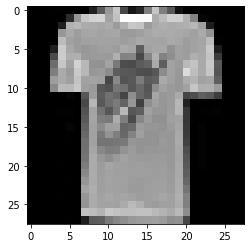

In [5]:
##random sample from the data set
rand = random.randint(1,len(x_tr))
#visulising in grayscale images
plt.imshow(x_tr[rand],cmap='gray')
print(f'label : {y_tr[rand]}')

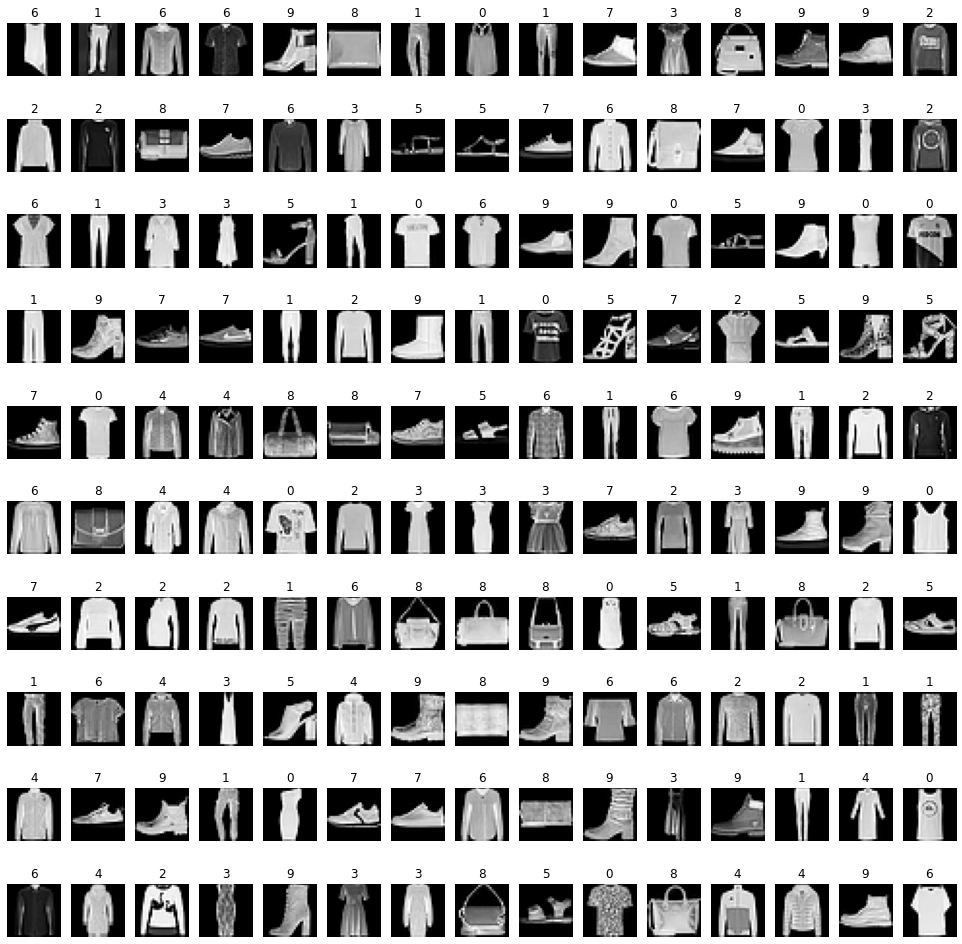

In [6]:
wid = 15
leng = 10
fig, axes = plt.subplots(leng, wid, figsize = (17,17))
 # flatten
axes = axes.ravel()

len_tr = len(x_tr) 

for i in np.arange(0, wid * leng): 

    index = np.random.randint(0, len_tr)
    #For the Grid View
    axes[i].imshow(x_tr[index], cmap = plt.cm.gray)
    axes[i].set_title(y_tr[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)

***Data Preprocessing***

In [7]:
#preparing the data to fit for the Process(noise introduction and training)
#divide each pixel value with max value of the pixel to get the pixel value b/w 0...1

x_tr,x_tst = x_tr/255.0,x_tst/255.0

*Adding Noise*

In [8]:
noiseFactor = 0.15

alteredSet = list()

#adding the noise to the dataset
for img in x_tr:
    noiseImg =  img + noiseFactor*np.random.randn(*img.shape)
    noiseImg = np.clip(noiseImg,0.,1.)
    alteredSet.append(noiseImg)


alteredSet = np.array(alteredSet)

In [9]:
alteredSet.shape

(60000, 28, 28)

Original


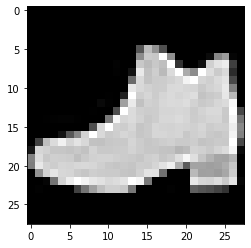

In [10]:
plt.imshow(x_tr[15], cmap='gray')
print('Original')

Noised added Images


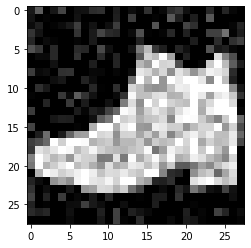

In [11]:
plt.imshow(alteredSet[15],cmap = 'gray')
print('Noised added Images')

In [12]:
#altering the test data also

alteredTestSet = list()

for img in x_tst:
    noisedImg = img + noiseFactor *np.random.randn(*img.shape)
    noisedImg = np.clip(noisedImg,0.,1.)
    alteredTestSet.append(noisedImg)

alteredTestSet = np.array(alteredTestSet)
alteredTestSet.shape

(10000, 28, 28)

*AutoEncoder Building and Training*

In [13]:
#Sequential Model is used
autoEn = tf.keras.models.Sequential()

#Encoder 
autoEn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,strides = 2, padding = 'same' ,input_shape = (28,28,1) ))

#Relu activation function is used with the convoluted Nueral Network
autoEn.add(tf.keras.layers.Conv2D(filters  = 16, kernel_size = 3, strides = 2, padding ='same',activation = 'relu'))

#Encoded images
autoEn.add(tf.keras.layers.Conv2D(filters  = 16, kernel_size = 3, strides = 1, padding ='same',activation = 'relu'))

#Decoder 

autoEn.add(tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = 3, strides = 2, padding = 'same' , activation = 'relu'))

autoEn.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=2, activation='sigmoid', padding="same"))

In [14]:
autoEn.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoEn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       9280      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        577       
 ranspose)                                                       
                                                                 
Total params: 17,121
Trainable params: 17,121
Non-traina

c:\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


***Training***

In [15]:
#training the Model on Train Data
history = autoEn.fit(alteredSet.reshape(-1, 28, 28, 1), x_tr.reshape(-1, 28, 28, 1),batch_size= 128, 
            validation_data = (alteredTestSet.reshape(-1, 28, 28, 1),x_tst.reshape(-1, 28, 28, 1)),epochs = 25)

Epoch 1/25
469/469 [==============================] - 24s 50ms/step - loss: 0.3221 - val_loss: 0.2811
Epoch 2/25
469/469 [==============================] - 26s 56ms/step - loss: 0.2748 - val_loss: 0.2736
Epoch 3/25
469/469 [==============================] - 24s 51ms/step - loss: 0.2697 - val_loss: 0.2702
Epoch 4/25
469/469 [==============================] - 22s 47ms/step - loss: 0.2669 - val_loss: 0.2679
Epoch 5/25
469/469 [==============================] - 23s 48ms/step - loss: 0.2648 - val_loss: 0.2662
Epoch 6/25
469/469 [==============================] - 22s 46ms/step - loss: 0.2634 - val_loss: 0.2649
Epoch 7/25
469/469 [==============================] - 22s 48ms/step - loss: 0.2625 - val_loss: 0.2641
Epoch 8/25
469/469 [==============================] - 22s 47ms/step - loss: 0.2619 - val_loss: 0.2636
Epoch 9/25
469/469 [==============================] - 23s 49ms/step - loss: 0.2613 - val_loss: 0.2632
Epoch 10/25
469/469 [==============================] - 23s 49ms/step - loss: 0.260

**Evaluation**


<span style ="font-size: 20px; color:cyan;">Currently, we cannot find any mathematical or specific methods to evaluate the visual analysis. In general, there are three criteria for visual analysis: (1) significant degree of artifacts, (2) protection of edges, and (3) reservation of textures. <span>
                                                                    <br>  *-- "Brief review of image denoising techniques"  on SpringerOpen*
                                                                       <br> 👉🏻 https://vciba.springeropen.com/articles/10.1186/s42492-019-0016-7

In [16]:
#Evaluation on the testing set
Evaluate = autoEn.evaluate(alteredTestSet.reshape(-1, 28, 28, 1), x_tst.reshape(-1, 28, 28, 1))
print(Evaluate)

313/313 [==============================] - 2s 5ms/step - loss: 0.2602
0.26022717356681824


In [17]:
predicts = autoEn.predict(alteredTestSet[:15].reshape(-1, 28, 28, 1))

1/1 [==============================] - 0s 194ms/step


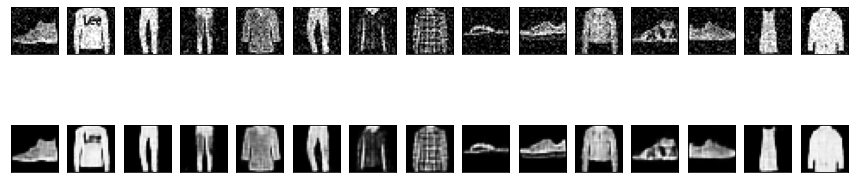

In [18]:
fig , axes = plt.subplots(nrows=2, ncols=15, sharex =True , sharey =True, figsize=(15,4))
for images, row in zip([alteredTestSet[:30], predicts], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap=plt.cm.gray)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

<span style= "font-size:40px;font-weight:bold;color: #FF449F;">Done By: Suhaas Kumar and Ujjwal R Sanagapati<span>